# Homework ada5

### TMI M1 37-176839 Koichiro Tamura

### homework1

以下の設定を元に，最小二乗分類に

$$\hat{\theta} = \min _{ \theta }{ \frac{1}{2}\sum_{i=1}{n}{(f_{\theta}(x_{i}) - y_{i})^2}} $$
によって得られる識別境界の向きは，フィッシャー判別分析と同じ
$${N}{(m_{1}- m_{2})}$$
であることを示せ。

### proof:

損失関数Lは
$$L = \frac{1}{2}\sum_{n=1}^{N}{(\mathbf{w^{T}x_{n}} + w_{0} - t_{n})}$$
とすることができる。


損失関数Lを$w_{0}$で偏微分すると，
$$\sum_{n=1}^{N}{(\mathbf{w^Tx_{n}} - w_{0} - t_{n} )} = 0$$
よって，
$$w_{0} = - \mathbf{w^{T}m}$$
$$\mathbf{m} = \frac{1}{N}(N_{1}\mathbf{m_{1}} + N_{2}\mathbf{m_{2}})$$

損失関数Lを$\mathbf{w}$で偏微分すると，
$$\sum_{n=1}^{N}{(\mathbf{w^Tx_{n}} - w_{0} - t_{n} )}\mathbf{x_{n}} = 0$$


\begin{eqnarray}
\sum_{n=1}^{N}{(\mathbf{w^Tx_{n}} - w_{0} - t_{n} )}\mathbf{x_{n}} = \sum_{n=1}^{N}{(\mathbf{w^Tx_{n}} - \mathbf{w^Tm} - t_{n} )}\mathbf{x_{n}}   \\
= (\sum_{n \in C_{1}}{\mathbf{x_{m}x_{m}^{T}} - N_{1}\mathbf{m_{1}m^{T}}})\mathbf{w} - N_{1}\mathbf{m_{1}}\frac{N}{N_{1}}   
    + (\sum_{n \in C_{2}}{\mathbf{x_{m}x_{m}^{T}} - N_{2}\mathbf{m_{2}m^{T}}})\mathbf{w} + N_{2}\mathbf{m_{2}}\frac{N}{N_{2}} \\
= (S_{w} + N_{1}\mathbf{m_{1}m_{1}^T}  + N_{2}\mathbf{m_{2}m_{2}^T} - (N_{1}\mathbf{m_{1}} + N_{2}\mathbf{m_{2}} )\frac{1}{N} (N_{1}\mathbf{m_{1}} + N_{2}\mathbf{m_{2}} )) \mathbf{w}  - N(\mathbf{m_{1}} - \mathbf{m_{2}}) \\
= (S_{w} + \frac{N_{2}N_{1}}{N}S_{B}) \mathbf{w} - N(\mathbf{m_{1}} - \mathbf{m_{2}}) = 0
\end{eqnarray}

$S_{B}\mathbf{w}$が常に$(\mathbf{m_{1}} - \mathbf{m_{2}})$と同じ方向になるので，

$$w \propto  S_{w}^{-1}(\mathbf{m_{1}} - \mathbf{m_{2}})$$






<div style="text-align: right;">
【Q.E.D】
</div>

### homework2

訓練標本:0~9まで各500文字ずつ計5000文字
テスト標本: 各200文字ずつ計2000文字

ガウスカーネルに対する最小二乗回帰により、パターン認識を行え

参考url: https://openbook4.me/sections/1454

### answer

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import math
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

In [2]:
def draw_digit(data):
    size = 16
    plt.figure(figsize=(2.5, 3))

    X, Y = np.meshgrid(range(size),range(size))
    Z = data.reshape(size,size)   # convert from vector to 28x28 matrix
    Z = Z[::-1,:]             # flip vertical
    plt.xlim(0,16)
    plt.ylim(0,16)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

    plt.show()


In [3]:
class GaussKernelModel(object):
    """ガウスカーネルモデル"""
    def __init__(self, h=0.3, _lambda=0.1):
        # hyperparameter 
        self.h = h
        self._lambda = _lambda
        self.weight = {}
        self.train_x = None
        self.K = None
    
    @staticmethod
    def sign(y, _class):
            if y == _class:
                return 1
            else:
                return-1
    
    def get_kernel(self, train_x):
        self.train_x = np.array(train_x)
        K = np.zeros(train_x.shape[0]*train_x.shape[0]).reshape([train_x.shape[0], train_x.shape[0]])
        for i in range(train_x.shape[0]):
            for j in range(train_x.shape[0]):
                K[i, j] = self.kernel(train_x[i], train_x[j])
        self.K = K
    
    def get_weight(self,train_y, _class):
        """cal weight of model"""
        train_y = list(map(lambda y: self.sign(y, _class), train_y))
        train_y = np.array(train_y)
        # trian_y = train_y.reshape([len(train_y), 1])
        
        # update weight
        self.weight[_class] = np.linalg.inv(self.K.T.dot(self.K) + self._lambda*np.eye(self.K.shape[0])).dot(self.K.T).dot(train_y)
        
    def kernel(self, x, c):
        """kernel function"""
        return math.exp(-1*np.power(x-c, 2).sum()) / (2*self.h**2)
    
    def predict(self, test_x):
        """
        predict funcation
        :return :predictions
        """
        
        predictions = []
        for i in range(test_x.shape[0]):
            _predicts = []
            for _class in range(10):
                predict = 0
                for j in range(len(self.train_x)):
                    predict += self.weight[_class][j]*self.kernel(test_x[i], self.train_x[j])
                _predicts.append(predict)
                # print(_class, predict)
            # print(np.argmax(_predicts))
            predictions.append(np.argmax(_predicts))
        return np.array(predictions)

In [4]:
# train
train_list = []
for i in range(10):
    train_list.append(pd.read_csv("digit/digit_train%i.csv"% i, header =None))
train_target = []
for i in range(10):
    for j in range(500):
            train_target.append(i)
train = pd.concat(train_list)
train_x, train_y = shuffle(train, train_target)
train_x = np.array(train_x.reset_index().drop("index", axis = 1))  

# test
test_list = []
for i in range(10):
    test_list.append(pd.read_csv("digit/digit_test%i.csv"% i, header =None))
test = pd.concat(test_list)
test_target = []
for i in range(10):
    for j in range(200):
            test_target.append(i)
test_x, test_y = shuffle(test, test_target)
test_x = np.array(test_x.reset_index().drop("index", axis = 1))

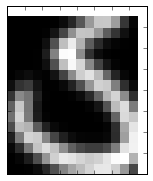

In [5]:
draw_digit(test_x[0])
#test_data.ix[1, :].shape

In [7]:
# 学習
model = GaussKernelModel()
model.get_kernel(train_x[:2000])
for _class in range(10):
    model.get_weight(train_y[:2000], _class)

In [9]:
prediction = model.predict(test_x[:400])

In [16]:
df_predict = pd.DataFrame(prediction)
pred_and_target = pd.concat([pd.DataFrame(df_predict), pd.DataFrame(test_y)], axis = 1)
pred_and_target.columns = ["pred", "target"]
pred_and_target = pd.DataFrame(pred_and_target.groupby(["pred", "target"]).size()).reset_index()
pred_and_target = pred_and_target.rename(columns={0: 'count'})   
pred_and_target.pivot(index="pred", columns="target").fillna(0)

count                                                      
target     0     1     2     3     4     5     6     7     8     9
pred                                                              
0.0     40.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0
1.0      0.0  33.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2.0      0.0   0.0  43.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3.0      0.0   0.0   0.0  34.0   0.0   2.0   0.0   0.0   1.0   0.0
4.0      0.0   0.0   0.0   0.0  35.0   0.0   0.0   1.0   0.0   1.0
5.0      0.0   0.0   0.0   0.0   0.0  43.0   0.0   0.0   1.0   0.0
6.0      0.0   0.0   0.0   0.0   1.0   1.0  35.0   0.0   0.0   0.0
7.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0  41.0   0.0   0.0
8.0      0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0  36.0   0.0
9.0      0.0   0.0   0.0   1.0   4.0   0.0   0.0   2.0   1.0  40.0

### **計算時間の関係から訓練及びテストサンプルを減らした